<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2020-12-19 04:08:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2020-12-19 04:08:19 (102 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [178]:
df = pd.read_csv('loan_train.csv')
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [179]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,0,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,0,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,0,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,0,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,1,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,1,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,1,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,1,1000,30,9/12/2016,11/10/2016,28,college,male


### Convert to date time object


In [180]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status                int64
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [189]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



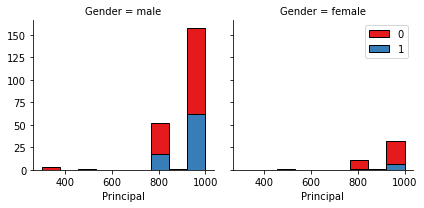

In [190]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

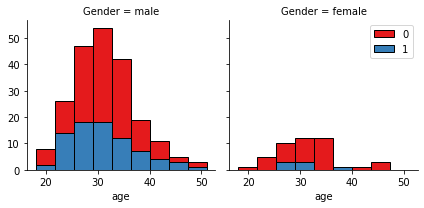

In [191]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


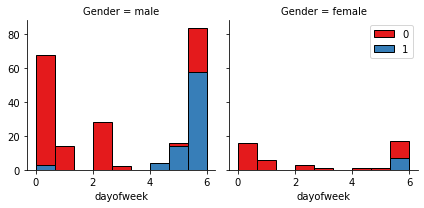

In [192]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [193]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [194]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  0              0.865385
        1              0.134615
male    0              0.731293
        1              0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [195]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [196]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [197]:
df[['Principal','terms','age','Gender','education']]

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college
...,...,...,...,...,...
341,800,15,32,0,High School or Below
342,1000,30,25,0,High School or Below
343,800,15,39,0,college
344,1000,30,28,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [198]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [199]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [200]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [201]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))


for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
#mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()) 

The best accuracy was with 0.7857142857142857 with k= 5


In [207]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
knn_yhat=knn_model.predict(X_test)

knn_model

KNeighborsClassifier()

# Decision Tree


In [208]:
from sklearn.tree import DecisionTreeClassifier 

In [209]:
depth_range = range(1, 10)
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))
max(f1_score_)

0.7334244702665754

In [210]:
#result = pd.DataFrame([f1_score_])
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 6).fit(X_train,y_train)

# Support Vector Machine


In [211]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

In [213]:
for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_yhat = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svc_yhat, average = 'weighted'))
accuracy_score

[0.6914285714285714,
 0.6914285714285714,
 0.6914285714285714,
 0.6914285714285714,
 0.6914285714285714,
 0.6914285714285714,
 0.6914285714285714,
 0.6914285714285714]

In [214]:
svc_model = SVC(C = 0.01, gamma = 'auto', kernel = 'sigmoid').fit(X_train, y_train)
svc_yhat = svc_model.predict(X_test)

# Logistic Regression


In [215]:
from sklearn.linear_model import LogisticRegression

In [165]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
#index = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
       # index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver).fit(X_train, y_train)
        #lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        #accuracy_score.append(log_loss(y_test, y_prob))

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.4827539604894662
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.4827500372227077
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.4981902487744225
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.48275353245267294
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.4827532223295835
Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.4920179847937498
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.49201778143096137
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5772287609479654
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.4920178014679269
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.49202984050989
Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.5181766145124602
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.518175744740909
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.670867975563743
Test 14: Accuracy at C = 0.001 when So

In [227]:
lr_model = LogisticRegression(C = 0.001, solver = 'liblinear').fit(X_train, y_train)
y_prob = lr_model.predict_proba(X_test)

# Model Evaluation using Test set


In [217]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [37]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-19 04:32:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-19 04:32:47 (42.7 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [221]:

test_df = pd.read_csv('loan_test.csv')
test_df.head()
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
X_loan_test = test_feature
X_loan_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)
y_loan_test = test_df['loan_status'].values
knn_yhat = knn_model.predict(X_loan_test)
jknn = round(jaccard_score(y_loan_test, knn_yhat,average='weighted'),2)
F1 = round(f1_score(y_loan_test, knn_yhat,average='weighted'),2)
print("METRICS FOR KNN :")
print("F1 Score for knn test set is: {}%".format(F1*100))
print("Jaccard index Score for knn test set is: {}%".format(jknn*100))
print("Log Loss is only applied to Logistic Regression")


METRICS FOR KNN :
F1 Score for knn test set is: 69.0%
F1 Score for knn test set is: 56.00000000000001%
Log Loss is only applied to Logistic Regression


In [223]:
svc_yhat = svc_model.predict(X_loan_test)
F1 = round(f1_score(y_loan_test, svc_yhat, average = 'weighted'),2)
jknn = round(jaccard_score(y_loan_test, svc_yhat,average='weighted'),2)
print("METRICS FOR SVC :")
print("F1 Score for SVC test set is: {}%".format(F1*100))
print("Jaccard index Score for svc test set is: {}%".format(jknn*100))
print("Log Loss is only applied to Logistic Regression")


METRICS FOR SVM :
F1 Score for knn test set is: 63.0%
Jaccard index Score for svc test set is: 55.00000000000001%
Log Loss is only applied to Logistic Regression


In [224]:
dt_yhat= dt.predict(X_loan_test)
jknn = round(jaccard_score(y_loan_test, dt_yhat,average='weighted'),2)
F1 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'),2)
print("METRICS FOR SVM :")
print("F1 Score for DT test set is: {}%".format(F1*100))
print("Jaccard index Score for Decsion Tree test set is: {}%".format(jknn*100))
print("Log Loss is only applied to Logistic Regression")


METRICS FOR SVM :
F1 Score for DT test set is: 69.0%
Jaccard index Score for Decsion Tree test set is: 56.99999999999999%
Log Loss is only applied to Logistic Regression


In [231]:
lr_predict=lr_model.predict_proba(X_loan_test)
log= round(log_loss(y_loan_test, lr_predict),2)
print("METRICS FOR Logistic Regression :")
print("Log loss Score for knn test set is: {}%".format(log*100))
print("Jaccard index and F1 score cannot be applied for Logistic Regression")

METRICS FOR Logistic Regression :
Log loss Score for knn test set is: 67.0%
Jaccard index and F1 score cannot be applied for Logistic Regression


In [232]:
#KNN and Decision Tree are the Best models

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
